In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Example of using numpy, pandas, and matplotlib

## Creating dataframe

In [2]:
df = pd.DataFrame(columns=['A', 'B'])

for col in df.columns:
    df[col] = np.random.lognormal(size=200000)

df['C'] = np.abs(np.random.normal(size=200000))

df['D'] = df['A'] * df['C']

df = np.log(df)

df.head()

,A,B,C,D
0,1.482230,0.382507,0.078352,1.560582
1,1.765456,-0.202942,-0.140512,1.624944
2,-0.914332,-0.811037,0.113978,-0.800354
3,1.662069,-0.851780,0.531307,2.193377
4,0.202400,0.365811,-0.359412,-0.157011


## A - D relationship

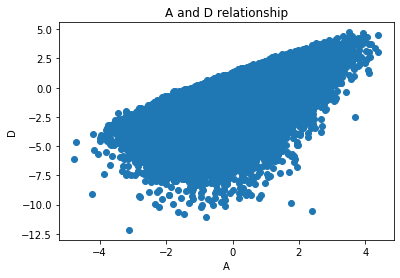

In [3]:
# Final thing

plt.scatter(df['A'], df['D'])
plt.xlabel('A')
plt.ylabel('D')
plt.title('A and D relationship')
plt.show()

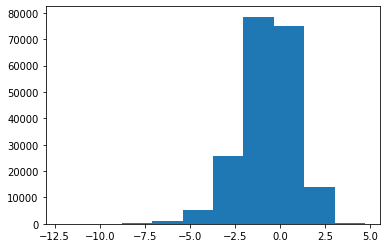

In [4]:
plt.hist(df['D'])
plt.show()

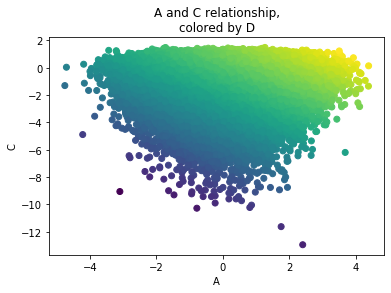

In [5]:
plt.scatter(df['A'], df['C'], c=df['D'])
plt.xlabel('A')
plt.ylabel('C')
plt.title('A and C relationship,\ncolored by D')
plt.show()